In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('../Data/CoAgMet/Akron02-2021.csv')
units = data.loc[0]
data = data.loc[1:,:]
data['Datetime'] = [pd.Timestamp(x) for x in data['Datetime']]
cols = ['AirTemp', 'RH', 'Dewpoint', 'SolarRad', 'Precip', 'Wind',
       'WindDir', 'Gust', 'GustDir', '5cmSoil']
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')
data = data.groupby(pd.Grouper(key='Datetime', axis=0, freq='D')).sum()
print(units)
data.head()

Datetime      NaN
AirTemp        °C
RH              %
Dewpoint       °C
SolarRad     W/m2
Precip         mm
Wind          m/s
WindDir        °N
Gust          m/s
GustDir        °N
5cmSoil        °C
15cm Soil      °C
Name: 0, dtype: object


,AirTemp,RH,Dewpoint,SolarRad,Precip,Wind,WindDir,Gust,GustDir,5cmSoil
Datetime,,,,,,,,,,
2021-01-01,-69.9,1755.4,-156.4,2157.6,0.0,80.9,7166.0,109.6,7180.0,-32.9
2021-01-02,-39.8,1657.0,-169.0,2562.2,0.0,78.6,6380.0,118.4,6353.0,-37.5
2021-01-03,39.3,1303.8,-183.2,2473.9,0.0,87.0,6262.0,131.5,5997.0,-26.3
2021-01-04,64.4,1334.2,-142.6,2605.4,0.0,95.9,5843.0,146.7,5809.0,-6.9
2021-01-05,65.8,1528.1,-93.4,1456.2,1.1,150.2,7035.0,225.7,6980.0,-0.3


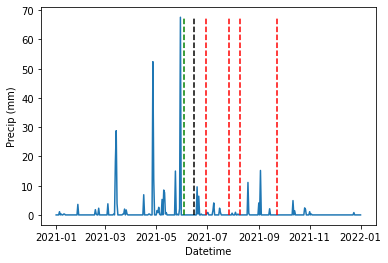

In [5]:
sns.lineplot(y = 'Precip', x = 'Datetime', data = data)
plt.ylabel('Precip (mm)')
plt.plot([pd.to_datetime('2021-06-30'),pd.to_datetime('2021-06-30')], [0, max(data['Precip'])], color = 'red', linestyle='dashed')
plt.plot([pd.to_datetime('2021-07-27'),pd.to_datetime('2021-07-27')], [0, max(data['Precip'])], color = 'red', linestyle='dashed')
plt.plot([pd.to_datetime('2021-08-10'),pd.to_datetime('2021-08-10')], [0, max(data['Precip'])], color = 'red', linestyle='dashed')
plt.plot([pd.to_datetime('2021-09-23'),pd.to_datetime('2021-09-23')], [0, max(data['Precip'])], color = 'red', linestyle='dashed')
plt.plot([pd.to_datetime('2021-06-15'),pd.to_datetime('2021-06-15')], [0, max(data['Precip'])], color = 'black', linestyle='dashed')
plt.plot([pd.to_datetime('2021-06-03'),pd.to_datetime('2021-06-03')], [0, max(data['Precip'])], color = 'green', linestyle='dashed')